## a)

In [1]:
n = 500
mu0 = 1
mu1 = 5
sigma0 = 1
sigma1 = 2
pi0 = 0.3
pi1 = 0.7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
sample0 = np.random.normal(mu0,sigma0,int(n*pi0))
sample1 = np.random.normal(mu1,sigma1,int(n*pi1))
samples = np.concatenate([sample0,sample1])

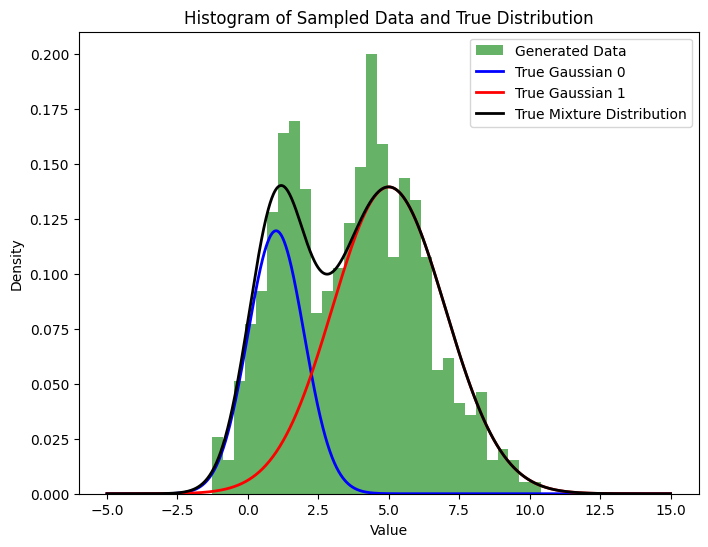

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Generated Data')

# Plot the true distributions
x = np.linspace(-5, 15, 1000)
pdf0 = pi0 * norm.pdf(x, mu0, sigma0)
pdf1 = pi1 * norm.pdf(x, mu1, sigma1)
plt.plot(x, pdf0, 'b', lw=2, label='True Gaussian 0')
plt.plot(x, pdf1, 'r', lw=2, label='True Gaussian 1')
plt.plot(x, pdf0 + pdf1, 'k', lw=2, label='True Mixture Distribution')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Sampled Data and True Distribution')

# Show plot
plt.show()

## b)

In [12]:
def log_likelihood(X,G,mu1,sigma1,mu2,sigma2,pi):
        return np.sum(np.log(np.exp(-0.5 * (X - mu1) ** 2 / sigma1 ** 2) / np.sqrt(2 * np.pi * sigma1 ** 2)) * (1 - G) + 
                  np.log(np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2)) * G +
                  (1 - G) * np.log(1-pi) + G * np.log(pi))
    # # Gaussian probabilities
    # log_p0 = (-0.5 * np.log(2 * np.pi * sigma0**2)) - ((samples - mu0)**2 / (2 * sigma0**2))
    # log_p1 = (-0.5 * np.log(2 * np.pi * sigma1**2)) - ((samples - mu1)**2 / (2 * sigma1**2))
    
    # # Complete log-likelihood
    # log_likelihood_val = np.sum(G * log_p1 + (1 - G) * log_p0)
    # return log_likelihood_val    

In [14]:
np.random.seed(42)
n0 = int(n * pi0)
n1 = int(n * pi1)
G = np.array([0] * n0 + [1] * n1)
pi = 0.3
ll_val = log_likelihood(samples, G, mu0, sigma0, mu1, sigma1,pi)
ll_val

-1409.9303341663558

## c)

In [15]:
def E_step(mu1,sigma1,pi,mu2,sigma2,X):
    G = pi * np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2) / (
        pi * np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2) + 
        (1 - pi) * np.exp(-0.5 * (X - mu1) ** 2 / sigma1 ** 2) / np.sqrt(2 * np.pi * sigma1 ** 2))
    return G    

In [17]:
mu1, sigma1 = 0, 1 
mu2, sigma2 = 5, 1 
pi = 0.5  
X = np.linspace(-5, 10, 100)  
gamma_balanced = E_step(mu1, sigma1, pi, mu2, sigma2, X)
gamma_balanced

array([5.17555501e-17, 1.10399702e-16, 2.35493471e-16, 5.02330840e-16,
       1.07152131e-15, 2.28566082e-15, 4.87554036e-15, 1.04000093e-14,
       2.21842473e-14, 4.73211912e-14, 1.00940776e-13, 2.15316648e-13,
       4.59291684e-13, 9.79714540e-13, 2.08982791e-12, 4.45780940e-12,
       9.50894788e-12, 2.02835253e-11, 4.32667634e-11, 9.22922811e-11,
       1.96868554e-10, 4.19940076e-10, 8.95773671e-10, 1.91077374e-09,
       4.07586916e-09, 8.69423157e-09, 1.85456547e-08, 3.95597130e-08,
       8.43847725e-08, 1.80001040e-07, 3.83959923e-07, 8.19024094e-07,
       1.74705769e-06, 3.72663928e-06, 7.94925621e-06, 1.69563961e-05,
       3.61689733e-05, 7.71488318e-05, 1.64551696e-04, 3.50939591e-04,
       7.48291262e-04, 1.59482696e-03, 3.39578695e-03, 7.21578445e-03,
       1.52671539e-02, 3.20125562e-02, 6.58956853e-02, 1.30795954e-01,
       2.42988627e-01, 4.06419279e-01, 5.93580721e-01, 7.57011373e-01,
       8.69204046e-01, 9.34104315e-01, 9.67987444e-01, 9.84732846e-01,
      

## d)

In [18]:
def M_step(mu1, sigma1,mu2, sigma2, pi,x):
    gamma = E_step(x, mu1, mu2, sigma1, sigma2, pi)
    mu1_new = np.sum((1 - gamma)*x) / np.sum( (1-gamma)) 
    mu2_new = np.sum((gamma)*x) / np.sum((gamma))
    sigma1_new = np.sqrt(np.sum((1-gamma)*(x - mu1)**2) / np.sum(1-gamma))
    sigma2_new = np.sqrt(np.sum((gamma)*(x - mu2)**2) / np.sum(gamma))
    pi_new = np.mean(gamma)
    return mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new

## e)

In [ ]:
def expectation_maximization(data, initial_params=None, tolerance=1e-8):
    if initial_params is None:
        mean1 = 2
        mean2 = 2
        std1 = 2
        std2 = 3
        mix_prob = 0.5
    else:
        mean1, mean2, std1, std2, mix_prob = initial_params

    change_in_params = 1
    while change_in_params > tolerance:
        responsibilities = E_step(mean1,  std1, mean2,std2, mix_prob,data )
        mean1_new, mean2_new, std1_new, std2_new, mix_prob_new = M_step(data, responsibilities)
        
        change_in_params = np.linalg.norm((mean1_new - mean1, mean2_new - mean2, std1_new - std1, std2_new - std2, mix_prob_new - mix_prob))
        
        mean1, mean2, std1, std2, mix_prob = mean1_new, mean2_new, std1_new, std2_new, mix_prob_new

    return mean1, mean2, std1, std2, mix_prob